In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model
%matplotlib inline
import matplotlib.pyplot
import sklearn.ensemble
import numpy as np

In [252]:
df = pd.read_csv('beijing3.csv', index_col=0)

In [253]:
df.isnull().sum()

year          0
month         0
day           0
hour          0
pm2.5         0
DEWP          0
TEMP          0
PRES          0
cbwd          0
Iws           0
Is            0
Ir            0
cars          0
average_pm    0
dtype: int64

In [254]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cars,average_pm
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4000000.0,138.5
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,4000000.0,153.5
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,4000000.0,170.0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4000000.0,159.5
29,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0,4000000.0,123.5


In [255]:
df.columns = ['year', 'month','day', 'hour', 'pm25', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'cars', 'average_pm']

In [256]:
df.head()

,year,month,day,hour,pm25,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cars,average_pm
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4000000.0,138.5
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,4000000.0,153.5
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,4000000.0,170.0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4000000.0,159.5
29,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0,4000000.0,123.5


In [354]:
feature_columns = ['day','hour','DEWP', 'TEMP','PRES','Iws','Is', 'average_pm']
X = df[feature_columns]

In [355]:
y = df['pm25']

In [356]:
import sklearn.model_selection
import sklearn.metrics
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(X,y, test_size=5)

In [357]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, lr.predict(Xtest))

0.9936754448316567

In [358]:
sklearn.metrics.median_absolute_error(Ytest, lr.predict(Xtest))

4.319478440762623

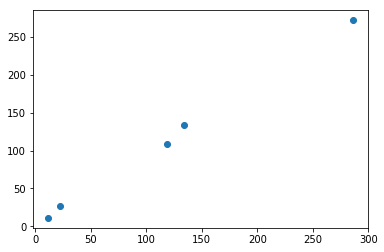

In [359]:
matplotlib.pyplot.scatter(Ytest, lr.predict(Xtest))

In [360]:
elastic = sklearn.linear_model.ElasticNetCV()
elastic.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, elastic.predict(Xtest))

0.992540072605847

In [361]:
sklearn.metrics.median_absolute_error(Ytest, elastic.predict(Xtest))

4.64245044526907

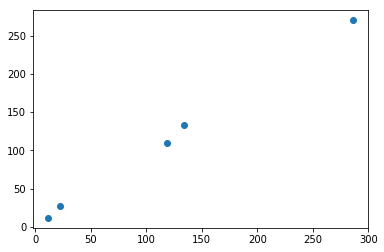

In [362]:
matplotlib.pyplot.scatter(Ytest, elastic.predict(Xtest))

In [363]:
import sklearn.tree
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, tree.predict(Xtest))

0.9654630569286673

In [364]:
sklearn.metrics.median_absolute_error(Ytest, tree.predict(Xtest))

16.0

In [365]:
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, ts.predict(Xtest))

0.9955310990536559

In [366]:
sklearn.metrics.median_absolute_error(Ytest, ts.predict(Xtest))

5.461915491491192

In [367]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, ransac.predict(Xtest))

0.9941542335640389

In [368]:
sklearn.metrics.median_absolute_error(Ytest, ransac.predict(Xtest))

4.335132379435727

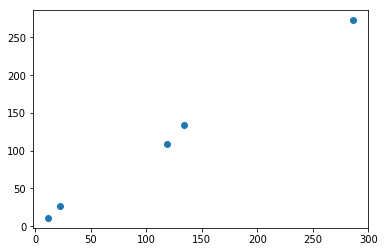

In [369]:
matplotlib.pyplot.scatter(Ytest, ransac.predict(Xtest))

In [370]:
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, huber.predict(Xtest))

0.9942702964194773

In [371]:
sklearn.metrics.median_absolute_error(Ytest, huber.predict(Xtest))

4.950799738664305

In [372]:
df.head(10)

,year,month,day,hour,pm25,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cars,average_pm
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4000000.0,138.5
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,4000000.0,153.5
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,4000000.0,170.0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4000000.0,159.5
29,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0,4000000.0,123.5
30,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0,4000000.0,107.0
31,2010,1,2,7,124.0,-7,-5.0,1024.0,SE,10.72,0,0,4000000.0,114.5
32,2010,1,2,8,120.0,-8,-6.0,1024.0,SE,12.51,0,0,4000000.0,122.0
33,2010,1,2,9,132.0,-7,-5.0,1025.0,SE,14.30,0,0,4000000.0,126.0
34,2010,1,2,10,140.0,-7,-5.0,1026.0,SE,17.43,1,0,4000000.0,136.0


In [375]:
Xnew = [[2,3,-7,-5,1022,5.36,1,170.0]]

In [377]:
huber.predict(Xnew)

array([171.09550236])